In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np  

In [21]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()
# lec=LabelEncoder()
# df['salary_encordered']=lec.fit_transform(df['salary'])
# df['salary_encordered'].unique()
## we can use lable encorder but we dont know waht value is converted to which value

# custom lable encording for salary
conditions=[df['salary']=='low',df['salary']=='medium',df['salary']=='high']
choise=[0,1,2]
df['salary']=np.select(conditions,choise)

# custom lable encording for departments
conditionse=[df['Department']=='sales',df['Department']=='accounting',df['Department']=='hr',
           df['Department']=='technical',df['Department']=='support',df['Department']=='management',
           df['Department']=='IT',df['Department']=='product_mng',df['Department']=='marketing',
           df['Department']=='RandD']
choise=[1,2,3,4,5,6,7,8,9,10]
df['Department']=np.select(conditionse,choise)



In [31]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  int32  
 9   salary                 14999 non-null  int32  
dtypes: float64(2), int32(2), int64(6)
memory usage: 1.0 MB


<Axes: >

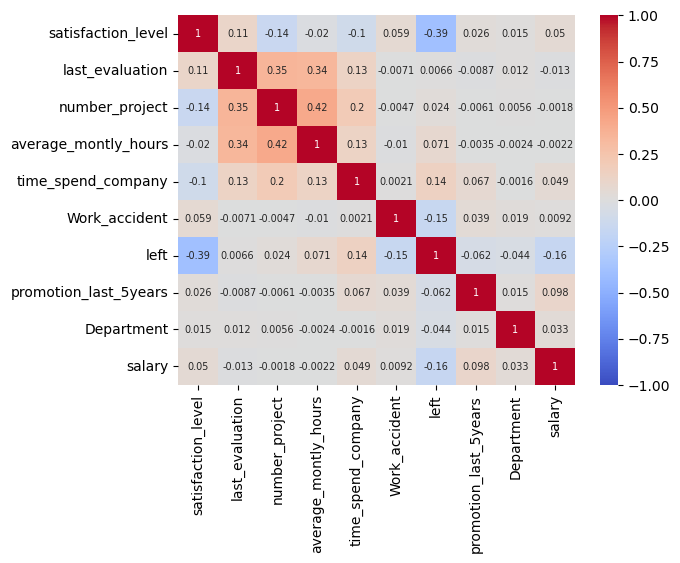

In [32]:
df['Department'].unique()
corelation_matrix=df.corr()
# heat map
sns.heatmap(corelation_matrix,annot=True,cmap='coolwarm',annot_kws={"fontsize":7},vmin=-1,vmax=1)
# in this moment we dont ommit un match value cause no anny un affect variable

Text(0.5, 1.0, 'Impact of salary on retention')

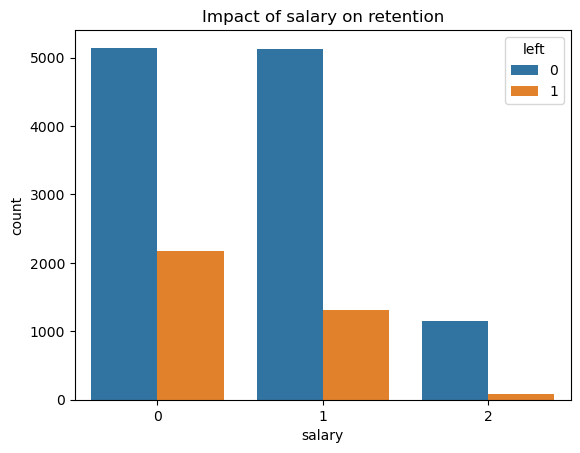

In [38]:
# impact salary on retention
sns.countplot(x='salary',hue='left',data=df)
plt.title('Impact of salary on retention')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

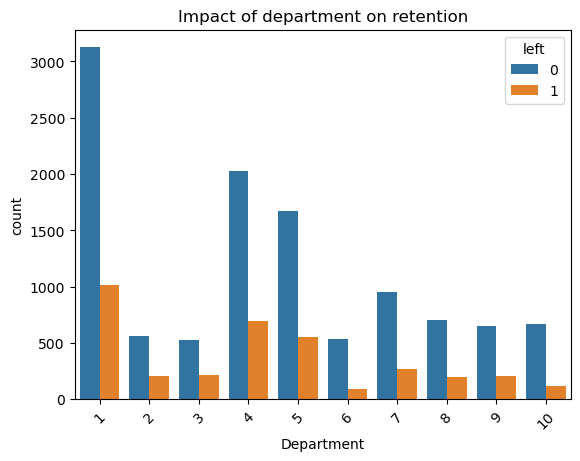

In [40]:
# impact of department on retention
sns.countplot(x='Department',hue='left',data=df)
plt.title('Impact of department on retention')
plt.xticks(rotation=45)

x


In [54]:
# MULTYNOMIAL LOGISTIC REGRESSION
# dependent variable
Y=df['salary']
# independent variable
X=df.drop('salary',axis=1)

# df split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.2,random_state=42)

# multy nomial regression object
MNLR=LogisticRegression()

# model fit
MNLR.fit(X_train,y_train)

# prediction
y_pred=MNLR.predict(X_test)

# accuarcy score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy is: ",accuracy)
# its means model is bad 

conf_matrix=confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy is:  0.49475
Confusion Matrix:
[[3752 2102    0]
 [2974 2185    0]
 [ 453  534    0]]


c:\Users\avish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

